In [3]:
import os
print(os.listdir("/content/drive/MyDrive"))

['mnist_784.csv', 'Colab Notebooks', 'Classroom', 'Emailing quiz of introduction of computers.pdf', 'iio-zdbg-ify - Sep 14, 2023.gjam', 'iio-zdbg-ify - Sep 14, 2023.pdf', 'ilovepdf_merged (3).pdf', 'IMG_20230920_191939.jpg', 'IMG_20230920_192053.jpg', 'DOC-20230920-WA0000. (1)', 'summary 6-10.gdoc', 'Untitled document (7).gdoc', 'Untitled document (6).gdoc', 'Untitled document (5).gdoc', 'SUMMARY 11-15.gdoc', 'summary 16-19.gdoc', 'IMG-231111-085459-4987.jpg', 'DOC-20230920-WA0000.', 'THE ALCHEMIST.gdoc', 'THE ALCHEMIST 21-40.gdoc', 'Untitled document (4).gdoc', 'Untitled document (3).gdoc', 'Alchemist 41-70.gdoc', 'ALCHEMIST 71-100.gdoc', 'ALCHEMIST 101-130.gdoc', 'ALCHEMIST 131-160.gdoc', 'Untitled document (2).gdoc', 'THE  DIARY OF YOUNG GIRL 7-54.gdoc', 'THE DIARY OF ANNE FRANK 55-108.gdoc', 'quiz 1 python.pdf', 'THE DIARY OF A YOUNG GIRL 109-164.gdoc', 'DHP quiz 2.pdf', 'THE DIARY OF A YOUNG GIRL 164-226.gdoc', 'THE DIARY OF A YOUNG GIRL (226-280).gdoc', 'Manu.pdf', 'manu@professi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
zip_path = "/content/drive/MyDrive/cell_images.zip"
extract_path = "/content/"  # Extracting inside Colab

In [5]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [6]:
import os
print(os.listdir("/content/"))

['.config', 'malaria_detection_cnn.h5', 'cell_images', 'drive', 'sample_data']


In [7]:
dataset_path = "/content/cell_images"

In [8]:
print(os.listdir(dataset_path))

['Parasitized', 'Uninfected']


Verify Class Distribution

In [9]:
import os

parasitized_path = "/content/cell_images/Parasitized"
uninfected_path = "/content/cell_images/Uninfected"

print(f"Parasitized: {len(os.listdir(parasitized_path))} images")
print(f"Uninfected: {len(os.listdir(uninfected_path))} images")

Parasitized: 13780 images
Uninfected: 13780 images


Check Sample Images

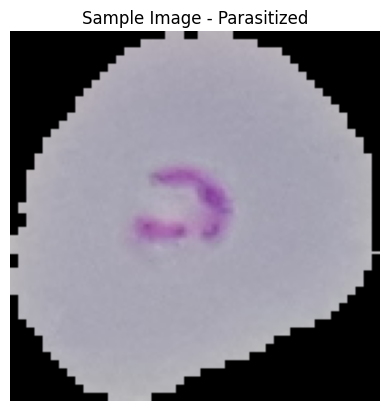

In [10]:
import matplotlib.pyplot as plt
import cv2

sample_img_path = os.path.join(parasitized_path, os.listdir(parasitized_path)[0])  # First Parasitized image
img = cv2.imread(sample_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

plt.imshow(img)
plt.axis("off")
plt.title("Sample Image - Parasitized")
plt.show()

✔ Resize images

✔ Normalize pixel values

✔ Convert images to NumPy arrays

✔ Split into training & testing sets

In [11]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

# Define paths
dataset_path = "/content/cell_images"
parasitized_path = os.path.join(dataset_path, "Parasitized")
uninfected_path = os.path.join(dataset_path, "Uninfected")

# Image properties
img_size = 64  # Resize all images to 64x64
data = []
labels = []

# Load images
def load_images_from_folder(folder, label):
    for filename in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  # Resize
            img = img / 255.0  # Normalize
            data.append(img)
            labels.append(label)

# Load both classes
load_images_from_folder(parasitized_path, 0)  # Parasitized = 0
load_images_from_folder(uninfected_path, 1)   # Uninfected = 1

# Convert to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Reshape labels for ML models
y_train_ml, y_test_ml = y_train, y_test  # Keep labels for ML models
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


100%|██████████| 13780/13780 [00:11<00:00, 1176.30it/s]


Training Samples: 22046, Testing Samples: 5512


🔹 Train SVM (Support Vector Machine)

In [12]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Flatten images for ML models
# X_train_ml = X_train.reshape(X_train.shape[0], -1)
# X_test_ml = X_test.reshape(X_test.shape[0], -1)

# # Train SVM
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train_ml, y_train_ml)

# # Predict and Evaluate
# svm_preds = svm_model.predict(X_test_ml)
# svm_acc = accuracy_score(y_test_ml, svm_preds)
# print(f"SVM Accuracy: {svm_acc:.4f}")


🔹 Train KNN (K-Nearest Neighbors)

In [13]:
# from sklearn.neighbors import KNeighborsClassifier

# # Train KNN
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train_ml, y_train_ml)

# # Predict and Evaluate
# knn_preds = knn_model.predict(X_test_ml)
# knn_acc = accuracy_score(y_test_ml, knn_preds)
# print(f"KNN Accuracy: {knn_acc:.4f}")


🔹 Train Decision Tree

In [14]:
# from sklearn.tree import DecisionTreeClassifier

# # Train Decision Tree
# dt_model = DecisionTreeClassifier()
# dt_model.fit(X_train_ml, y_train_ml)

# # Predict and Evaluate
# dt_preds = dt_model.predict(X_test_ml)
# dt_acc = accuracy_score(y_test_ml, dt_preds)
# print(f"Decision Tree Accuracy: {dt_acc:.4f}")


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define preprocessing with dataset splitting
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # ✅ Add this to split dataset
)

# Define batch size and image size
batch_size = 32
img_size = (128, 128)
dataset_path = "/content/cell_images"

# Training data generator (80% of images)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # ✅ This will now work
)

# Validation data generator (20% of images)
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # ✅ This will now get images
)


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [16]:
print("Training set size:", train_generator.samples)
print("Validation set size:", validation_generator.samples)


Training set size: 22048
Validation set size: 5510


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Define the CNN Model



In [18]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


Train the Model

In [31]:
cnn_model_2 = create_cnn_model()  # Create model

# Define Early Stopping (stop training if validation loss doesn't improve for 5 epochs)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn_model_2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3,  # Start with 50 epochs
    callbacks=[early_stop],  # Apply early stopping
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 149s 212ms/step - accuracy: 0.5753 - loss: 0.6799 - val_accuracy: 0.7036 - val_loss: 0.6074
Epoch 2/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 139s 202ms/step - accuracy: 0.6872 - loss: 0.6057 - val_accuracy: 0.8038 - val_loss: 0.5553
Epoch 3/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 154s 223ms/step - accuracy: 0.7582 - loss: 0.5454 - val_accuracy: 0.8508 - val_loss: 0.4965


Evaluate the Model

In [20]:
# Evaluate on validation set
val_loss, val_acc = cnn_model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

173/173 ━━━━━━━━━━━━━━━━━━━━ 28s 159ms/step - accuracy: 0.6736 - loss: 0.5962
Validation Accuracy: 0.6831, Validation Loss: 0.5947


In [21]:
# Create the model
cnn_model = create_cnn_model()

# Print model summary
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Plot Training Results

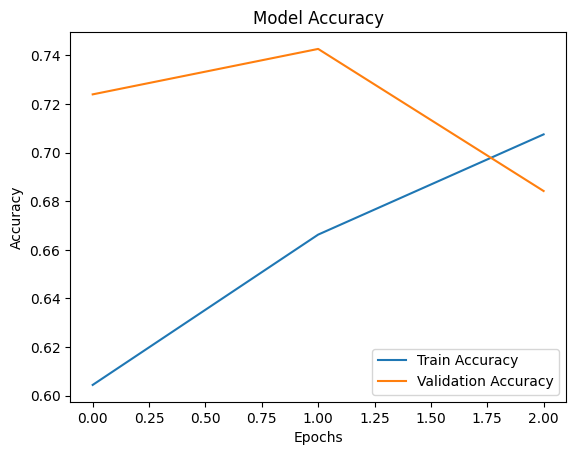

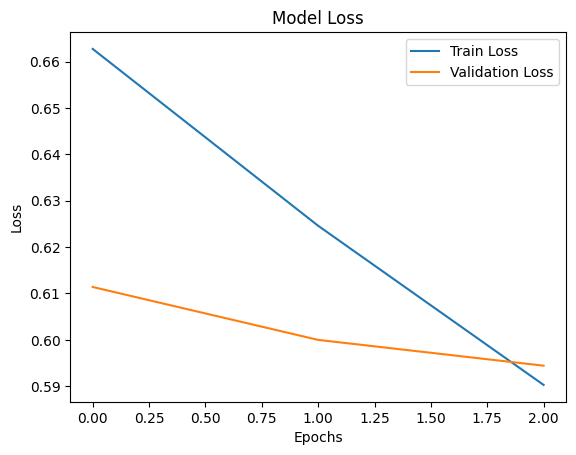

In [22]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

Save the Model


In [23]:
cnn_model.save("malaria_detection_cnn.h5")

3-Layer CNN for Comparison

In [24]:
def create_3_layer_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu'),  # Extra Conv layer
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [32]:
# Create the model
cnn_model_3 = create_3_layer_cnn()

# Print model summary
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

In [ ]:
history = cnn_model_3.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=3,  # Adjust as needed
                        verbose=1)


Epoch 1/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 143s 203ms/step - accuracy: 0.6063 - loss: 0.6562 - val_accuracy: 0.8310 - val_loss: 0.5190
Epoch 2/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.8034 - loss: 0.4922

In [27]:
cnn_model.save("malaria_3_layer_cnn.h5")

In [28]:
test_loss, test_acc = cnn_model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

173/173 ━━━━━━━━━━━━━━━━━━━━ 27s 158ms/step - accuracy: 0.9000 - loss: 0.2653
Test Accuracy: 0.8973, Test Loss: 0.2650


 Evaluate Model Performance   
✅ Loss & Accuracy Curves   
✅ Confusion Matrix    
✅ AUC-ROC Curve

In [30]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Example usage:
plot_training_history(history_2layer, "2-Layer CNN")
plot_training_history(history_3layer, "3-Layer CNN")



NameError: name 'plot_training_history' is not defined

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get predictions
y_pred = cnn_model_3layer.predict(validation_generator)
y_pred = np.round(y_pred)  # Convert probabilities to class labels

# True labels
y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Parasitized', 'Uninfected'], yticklabels=['Parasitized', 'Uninfected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Parasitized', 'Uninfected']))


Grad-CAM for Model Interpretation
(Gradient-weighted Class Activation Mapping)


In [ ]:
import tensorflow as tf
import cv2
import numpy as np

def grad_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)[0]

    heatmap = np.maximum(heatmap, 0)  # Apply ReLU
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap.numpy()

# Example usage
img_path = "sample_infected_cell.jpg"  # Path to a test image
img = cv2.imread(img_path)
img = cv2.resize(img, (128, 128))
img_array = np.expand_dims(img, axis=0) / 255.0

# Generate heatmap
heatmap = grad_cam(cnn_model_3layer, img_array, "conv2d_2")  # Change layer_name based on your model

# Overlay heatmap on original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

# Show image
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
